In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import make_column_selector
import numpy as np


In [9]:

# Load the data
data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

# Convert 'Loan_Status' to numerical values
data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), make_column_selector(dtype_include=np.number)),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Ignore unknown categories
        ]), make_column_selector(dtype_include=object))
    ])

# Define pipeline with RandomForestClassifier
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=82))])  # Use RandomForestClassifier

# Split the data into features and target variable
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=41)

# Fit the model
clf.fit(X_train, y_train)

# Predict on the validation data
y_pred = clf.predict(X_val)

# Calculate and print the accuracy
accuracy = accuracy_score(y_val, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7967479674796748


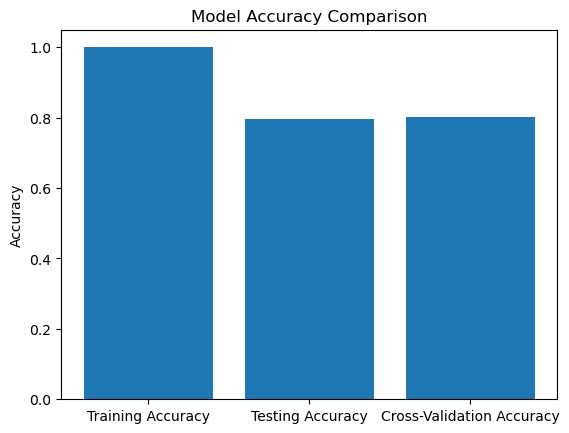

In [10]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Fit the model
clf.fit(X_train, y_train)

# Calculate training accuracy
train_acc = clf.score(X_train, y_train)

# Calculate testing accuracy
test_acc = clf.score(X_val, y_val)

# Calculate cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5).mean()

# Prepare data for plotting
labels = ['Training Accuracy', 'Testing Accuracy', 'Cross-Validation Accuracy']
values = [train_acc, test_acc, cv_acc]

# Create bar chart
plt.bar(labels, values)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

contion 10

In [11]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Predict on the validation data using the best model
y_pred = grid_search.predict(X_val)

# Calculate and print the accuracy
accuracy = accuracy_score(y_val, y_pred)
print('Accuracy:', accuracy)

Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best score: 0.8125747268604411
Accuracy: 0.7967479674796748


instruction 12-15


In [2]:
from sklearn.model_selection import GridSearchCV


In [13]:
def classify_new_data(new_data, model):
    """
    Classify new data using the learned model.

    Parameters:
    new_data (pd.DataFrame): New data to classify.
    model (sklearn.Pipeline): The trained model.

    Returns:
    int: The predicted class.
    """
    # Ensure new_data is a DataFrame
    if not isinstance(new_data, pd.DataFrame):
        new_data = pd.DataFrame([new_data])

    # Preprocess and predict
    prediction = model.predict(new_data)

    return prediction[0]

In [34]:
def get_user_input():
    """
    Get data from the user.

    Returns:
    dict: The data provided by the user.
    """
    # Define the columns, the possible values for each column, and an example for each column
    columns = {
        'Loan_ID': {'values': None, 'example': 'LP001002'},
        'Gender': {'values': ['Male', 'Female'], 'example': 'Male'},
        'Married': {'values': ['Yes', 'No'], 'example': 'No'},
        'Dependents': {'values': list(range(4)), 'example': '0'},
        'Education': {'values': ['Graduate', 'Not Graduate'], 'example': 'Graduate'},
        'Self_Employed': {'values': ['Yes', 'No'], 'example': 'No'},
        'ApplicantIncome': {'values': None, 'example': '5849'},
        'CoapplicantIncome': {'values': None, 'example': '0'},
        'LoanAmount': {'values': None, 'example': '128'},
        'Loan_Amount_Term': {'values': None, 'example': '360'},
        'Credit_History': {'values': list(range(11)), 'example': '1'},  # Allow values from 0 to 10
        'Property_Area': {'values': ['Urban', 'Semiurban', 'Rural'], 'example': 'Urban'}
    }

    # Get the data from the user
    data = {}
    for column, info in columns.items():
        values = info['values']
        example = info['example']
        if values is None:
            data[column] = input(f'Enter {column} (e.g., {example}): ')
        else:
            while True:
                value = input(f'Enter {column} ({", ".join(map(str, values))}, e.g., {example}): ')
                if value in map(str, values):
                    data[column] = value
                    break
                else:
                    print(f'Invalid value. Please enter one of the following: {", ".join(map(str, values))}')

    return data
def communicate_with_user(model):
    """
    Communicate with the user to get data and classify it.

    Parameters:
    model (sklearn.Pipeline): The trained model.
    """
    # Get data from the user
    data = get_user_input()

    # Print the user's input
    print("\nApplicant Data:")
    for key, value in data.items():
        print(f"{key}: {value}")

    # Classify the data
    prediction = classify_new_data(data, model)

    # Communicate the result to the user
    if prediction == 1:
        print('Yes, your loan is likely to be approved.')
    else:
        print('No, your loan is not likely to be approved.')

# Example usage:
communicate_with_user(grid_search.best_estimator_)

Invalid value. Please enter one of the following: Male, Female

User's Input:
Loan_ID: l090923
Gender: Male
Married: No
Dependents: 1
Education: Graduate
Self_Employed: No
ApplicantIncome: 543
CoapplicantIncome: 343
LoanAmount: 3453
Loan_Amount_Term: 345
Credit_History: 0
Property_Area: Urban
No, your loan is not likely to be approved.
